In [143]:
import pandas as pd

In [144]:
iris = pd.read_csv("iris_data.txt", sep="\t")
iris

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [145]:
#!pip install sklearn

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)

In [147]:
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 3  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=3, random_state=123457)

In [148]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [149]:
print(kmeans.cluster_centers_)

[[-0.06881714 -0.89036741  0.34501443  0.28492552]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13140499  0.08716178  0.98548265  0.99875633]]


In [150]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [151]:
print(kmeans.inertia_ )

140.96837895511078


In [152]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [153]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

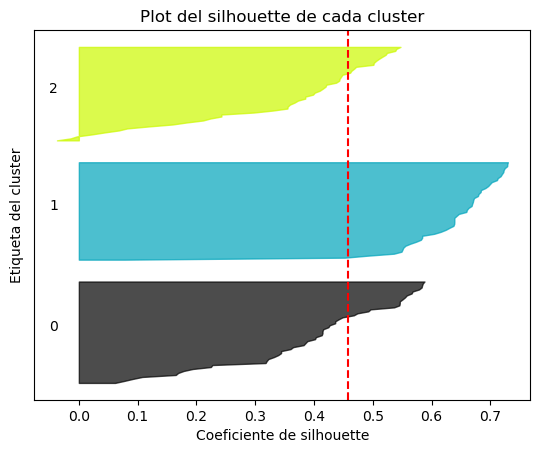

In [154]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)
